In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as si
import timeit

# Parametre
hej1 = timeit.default_timer()
gennemgange = 500
R0 = np.zeros(gennemgange)
beta = np.zeros(gennemgange)
gamma = np.zeros(gennemgange)
delta = np.zeros(gennemgange)
mu_dage = 200  # Immunitettab
mu = 1/mu_dage
Smittetryk = (1.5,1.9)
np.random.seed(20)

# Hvor lang tid varer modellen og hvor mange datapunkter skal den regnes med
tid = (0,1500)
datapunkter = 1000

# data = np.empty([gennemgange,4,datapunkter]) # En type syge
data = np.empty([gennemgange,5,datapunkter]) # To typer syge

# Startbetingelser
N = 5800000
start_syge_1 = 200
start_helbredte_1 = 0.
start_døde_1 = 0.
start_raske_1 = N-start_syge_1-start_helbredte_1-start_døde_1
start_asymptotiske = 0.

# y0_1 = (start_syge_1, start_raske_1, start_helbredte_1, start_døde_1) # En type syge
y0_1 = (start_syge_1, start_raske_1, start_helbredte_1, start_døde_1, start_asymptotiske) # To typer syge

# Til at variere smitteparameter med tiden mere blødt
prøve = np.linspace(1., 2., 41)
prøve1 = np.linspace(1., 0.8, 50)
prøve2 = np.linspace(0.5, 1, 6)
prøve3 = np.linspace(.95, 1.1, 21)

# Starter Monte-Carlo simulation
for i in range(gennemgange):
    start = timeit.default_timer()
    R0[i] = np.random.uniform(*Smittetryk, 1)
    gamma[i] = np.random.uniform(1/21,1/10,1)
    R0_1 = np.random.uniform(2.9, 3.1, 1)
    R0_2 = np.random.uniform(1.9, 2.1, 1)
    R0_3 = np.random.uniform(0.9, 1.1, 1)
    R0_4 = np.random.uniform(1.6, 1.7, 1)
    R0_5 = np.random.uniform(0.7, 0.9, 1)
    R0_6 = np.random.uniform(0.5, 1.6, 1)
    R0_7 = np.random.uniform(1.9, 2.1, 1)
    R0_8 = np.random.uniform(0.5, 1.6, 1)
    R0_9 = np.random.uniform(0.9,1.1,1)
    delta = 364/7515   # Almindelig dødelighed
#     delta = 0        # Ingen dødelighed
    def sygdom_1(t,y):
        I = np.array(y[0])  # Inficerede
        S = np.array(y[1])  # Modtagelige
        R = np.array(y[2])  # Raske/helbredte
        D = np.array(y[3])  # Døde
#         mu=0              # For at have evig immunitet

#         if t < 14:        # Disse 'if'- og 'else'-loops giver mulighed for at ændre parametrene med tiden
#             R0[i] = R0_1 * prøve1[-int(t)]
# #         elif 600 < t < 800 and t < 19:
# #             R0[i] = R0_2           
# #         else:
# #             R0[i] = R0_3 * prøve[-int(t-19)]
        
#         elif t < 37:    # Svag Nedlukningsfase
#             R0[i] = R0_3 * prøve[-int(t)+13] 
#         elif t < 43:
#             R0[i] = R0_4 * prøve2[-int(t)+36]
#         elif t < 60:    # Yderligere nedlukning
#             R0[i] = R0_5 * prøve3[-int(t)+39]
#         else:           # Åbningsfase
#             R0[i] = R0_6

#         if t < 150:
#             R0[i] = R0[i]
#         else:
#             R0[i] = R0_9
#         beta[i] = R0[i]*gamma[i]
        
        dIdt = beta[i]*I*S/N - gamma[i]*I - delta*gamma[i]*I   # Dette afsnit beskriver ændringen af grupperne.
        dSdt = -beta[i]*I*S/N  +  mu*R
        dRdt = gamma[i]*I - mu*R
        dDdt = delta*gamma[i]*I

        return (dIdt, dSdt, dRdt, dDdt)
    
# To grupper

#         A = np.array(y[4])
#         p = 0.4
#         r_b = np.random.uniform(0.4, 0.6, 1)
#         delta_2 = 0.005
#         beta[i] = R0[i]*gamma[i]/(p*r_b+(1-p))

#         dIdt = beta[i]*I*S/N - gamma[i]*I - delta*gamma[i]*I
#         dSdt = -beta[i]*I*S/N  +  mu*R
#         dRdt = gamma[i]*I - mu*R
#         dDdt = delta*gamma[i]*I
#         dAdt = r_b*beta[i]*I*S/N - gamma[i]*A - delta_2*gamma[i]*A

#         return (dIdt, dSdt, dRdt, dDdt, dAdt)
# Slut

# Løser differentialligningerne
    solve_rep = si.solve_ivp(sygdom_1, tid, t_eval=np.linspace(tid[0], tid[1], datapunkter), y0=y0_1) 
    data[i] = solve_rep.y     # Samler data på en nem måde
    stop = timeit.default_timer()
    print('Tid:', round(stop-start,5), 'Gennemgang:', i)
hej2 = timeit.default_timer()
print(data[1][0][200]+data[1][1][200]+data[1][2][200]+data[1][3][200], 'Tid:', hej2-hej1)
# Data[i][0] er smittede. [i][1] er modtagelige. [i][2] er helbredte. [i][3] er døde.  

Tid: 0.48149 0
Tid: 0.16923 1
Tid: 0.21821 2
Tid: 0.25952 3
Tid: 0.16647 4
Tid: 0.18384 5
Tid: 0.20638 6
Tid: 0.13516 7
Tid: 0.20686 8
Tid: 0.14931 9
Tid: 0.18826 10
Tid: 0.21778 11
Tid: 0.16086 12
Tid: 0.19168 13
Tid: 0.21011 14
Tid: 0.21471 15
Tid: 0.23257 16
Tid: 0.22335 17
Tid: 0.22213 18
Tid: 0.15903 19
Tid: 0.23947 20
Tid: 0.22578 21
Tid: 0.17372 22
Tid: 0.21489 23
Tid: 0.19447 24
Tid: 0.15287 25
Tid: 0.18863 26
Tid: 0.1921 27
Tid: 0.2314 28
Tid: 0.25024 29
Tid: 0.14815 30
Tid: 0.18877 31
Tid: 0.17229 32
Tid: 0.17334 33
Tid: 0.17841 34
Tid: 0.17958 35
Tid: 0.21318 36
Tid: 0.15505 37
Tid: 0.20151 38
Tid: 0.19895 39
Tid: 0.14315 40
Tid: 0.14775 41
Tid: 0.17055 42
Tid: 0.19022 43
Tid: 0.20566 44
Tid: 0.24189 45
Tid: 0.15474 46
Tid: 0.2252 47
Tid: 0.23279 48
Tid: 0.20468 49
Tid: 0.21722 50
Tid: 0.21804 51
Tid: 0.2388 52
Tid: 0.18318 53
Tid: 0.1515 54
Tid: 0.14464 55
Tid: 0.20728 56
Tid: 0.18249 57
Tid: 0.24743 58
Tid: 0.18506 59
Tid: 0.17297 60
Tid: 0.19658 61
Tid: 0.18492 62
Tid: 0.

Tid: 0.18056 492
Tid: 0.22861 493
Tid: 0.15088 494
Tid: 0.19287 495
Tid: 0.15346 496
Tid: 0.13406 497
Tid: 0.15108 498
Tid: 0.19382 499
5800000.000000003 Tid: 96.76728169999978


In [159]:
data = data*100/N   # Omregner vores data til procent af befolkiningen. Bruges til at ændre y-aksen til procent.
np.shape(data)
temp = np.empty([datapunkter, gennemgange])
for i in range(datapunkter):
    temp[i] = np.sort(data[:,0,i])

In [160]:
mean = np.zeros(datapunkter)     # Udregner gennemsnittet af smittede
for i in range(datapunkter):
    mean[i] = np.mean(data[:,0,i])

No handles with labels found to put in legend.


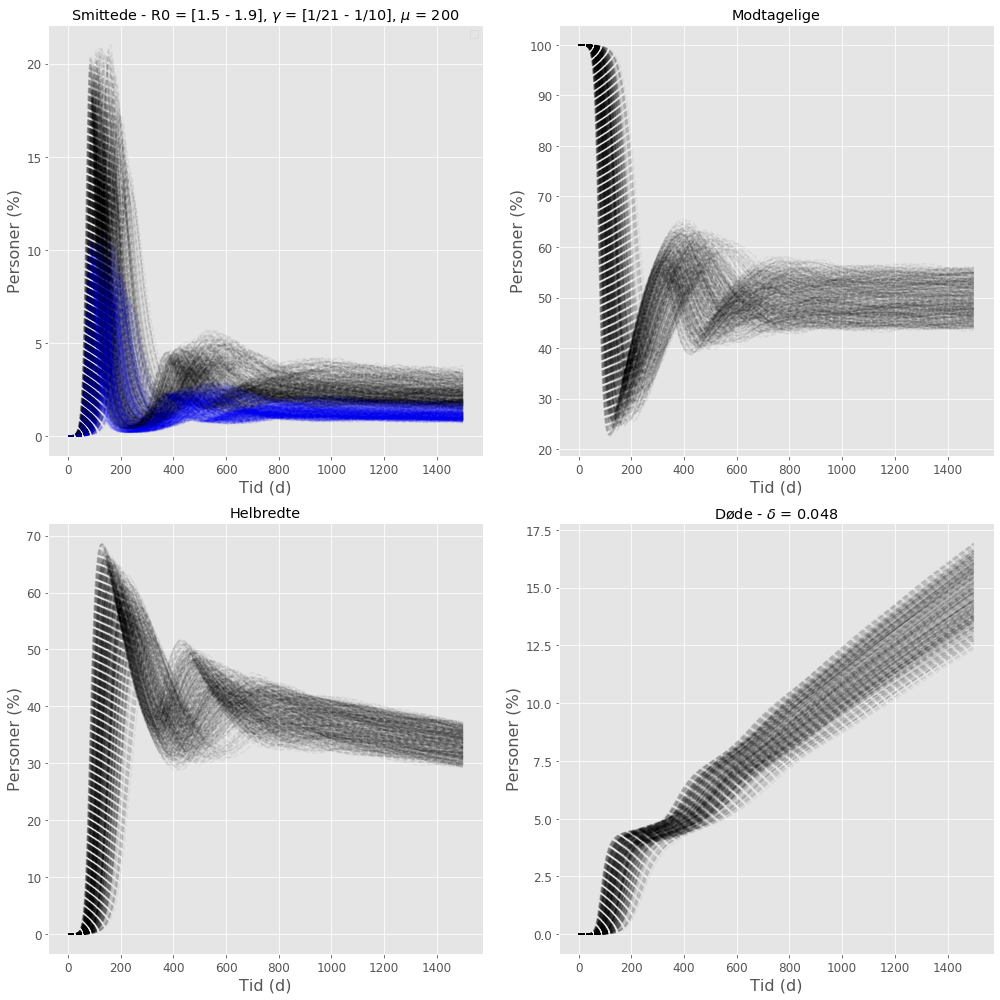

In [163]:
plt.rcParams['axes.grid']=True
plt.rcParams['xtick.labelsize']='large'
plt.rcParams['ytick.labelsize']='large'
plt.style.use('ggplot')

fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2, figsize=(14,14), sharey=False, sharex=False)
for i in range(gennemgange):   # Plotter smittede for hver gennemgang
    ax1.plot(solve_rep.t,data[i][0], ls='--', c='k', alpha=0.05)
    ax1.plot(solve_rep.t, data[i][4], ls='--', c='b', alpha=0.05)
    ax2.plot(solve_rep.t,data[i][1], ls='--', c='k', alpha=0.05)
    ax3.plot(solve_rep.t,data[i][2], ls='--', c='k', alpha=0.05)
    ax4.plot(solve_rep.t,data[i][3], ls='--', c='k', alpha=0.05)

ax1.set_title('Smittede - R0 = [%1.1f - %1.1f], $\gamma$ = [1/21 - 1/10], $\mu$ = %1.0f' %(Smittetryk[0], Smittetryk[1]\
                                                                                         , mu_dage))
#
ax2.set_title('Modtagelige')
ax3.set_title('Helbredte')
q = 364./7515.
# q=0
ax4.set_title('Døde - $\delta$ = %1.3f' %q)
# ax1.plot(solve_rep.t,mean, lw=5)
# ax1.plot(solve_rep.t, temp[:,int(gennemgange*0.025)], 'r', lw=5)
# ax1.plot(solve_rep.t, temp[:,int(gennemgange*0.975)], 'r', lw=5)

# ax1.plot(solve_rep.t, temp[:,int(gennemgange*0.1)], 'c', lw=5)
# ax1.plot(solve_rep.t, temp[:,int(gennemgange*0.90)], 'c', lw=5)
# ax1.plot(solve_rep.t, temp[:,int(gennemgange*0.20)], 'g', lw=5)
# ax1.plot(solve_rep.t, temp[:,int(gennemgange*0.8)], 'g', lw=5)

# ax1.plot(solve_rep.t, temp[:,int(gennemgange*0.5)], 'g', lw=3, label='50%', alpha=0.7)

# ax1.fill_between(solve_rep.t, temp[:,int(gennemgange*0.025)], temp[:,int(gennemgange*0.10)], fc='r', label='95%', alpha=0.5)
# ax1.fill_between(solve_rep.t, temp[:,int(gennemgange*0.9)], temp[:,int(gennemgange*0.975)], fc='r', alpha=0.5)
# ax1.fill_between(solve_rep.t, temp[:,int(gennemgange*0.1)], temp[:,int(gennemgange*0.20)], fc='b', label='80%', alpha=0.5)
# ax1.fill_between(solve_rep.t, temp[:,int(gennemgange*0.8)], temp[:,int(gennemgange*0.90)], fc='b', alpha=0.5)
# ax1.fill_between(solve_rep.t, temp[:,int(gennemgange*0.2)], temp[:,int(gennemgange*0.5)], fc='c', label='60%', alpha=0.5)
# ax1.fill_between(solve_rep.t, temp[:,int(gennemgange*0.5)], temp[:,int(gennemgange*0.80)], fc='c', alpha=0.5)


# Herunder sættes linjer for at tilføje tekst til hvornår vedtag indtraf.

# ax1.vlines(14,0,0.15, lw=1.5, alpha=0.8, colors='mediumorchid')
# ax1.text(14, 0.027, 'Langsom/svag nedlukningsfase - R0: ~3 --> ~2.7', fontsize=13.5, c='k')

# ax1.vlines(37,0, 0.15, lw=1.5, alpha=0.8, colors='royalblue')
# ax1.text(37, 0.065, 'Yderligere nedlukning - R0: ~1.6 --> ~0.8', fontsize=13.5, c='k')

# ax1.vlines(60,0, 0.15, lw=1.5, alpha=0.8, colors='firebrick')
# ax1.text(60, 0.1, 'Uvis åbningsmåde - R0: [0.5 - 1.6]', fontsize=13.5, c='k')

# ax1.vlines(150, 0, 0.0015, colors='royalblue')
# ax1.text(150, 0.0013, 'R0 ændres herefter til ~1', fontsize=14)

# ax1.vlines(20,0,200, lw=0.5, alpha=0.4)

ax1.legend(loc='upper right')
ax1.set_xlabel('Tid (d)', fontsize=16)
ax2.set_xlabel('Tid (d)', fontsize=16)
ax3.set_xlabel('Tid (d)', fontsize=16)
ax4.set_xlabel('Tid (d)', fontsize=16)
ax1.set_ylabel('Personer (%)', fontsize=16)
ax2.set_ylabel('Personer (%)', fontsize=16)
ax3.set_ylabel('Personer (%)', fontsize=16)
ax4.set_ylabel('Personer (%)', fontsize=16)

# ax1.set_ylim(0,0.2)
# ax2.set_ylim(98,100)
# ax3.set_ylim(0,0.25)
# ax4.set_ylim(0,0.08)
plt.tight_layout()